# =======================================================
#**Scrapping images from different search engines**



In [1]:
import requests # http requests
from bs4 import BeautifulSoup # Webscrape
from collections import defaultdict # Default dictionary: store a list with each key
import pandas as pd     # DF
import os
import json

## **Prepare the data of contexts**

In [2]:
'''DataName='it.test.data.v1.1.txt'
txt_pathData = DataName
language='it'
'''
DataName='en.test.data.v1.1.txt'
txt_pathData = DataName
language='en'

In [3]:
testFa = pd.read_csv(txt_pathData, delimiter='\t', header=None)
testFa.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,goal,football goal,image.4418.jpg,image.4416.jpg,image.4417.jpg,image.4413.jpg,image.4412.jpg,image.4415.jpg,image.4419.jpg,image.4414.jpg,image.2166.jpg,image.1150.jpg
1,mustard,mustard seed,image.4429.png,image.4422.jpg,image.4423.jpg,image.4424.jpg,image.4421.jpg,image.4427.jpg,image.4426.jpg,image.4420.jpg,image.4425.jpg,image.4428.jpg
2,seat,eating seat,image.4435.jpg,image.4436.jpg,image.1166.jpg,image.4430.jpg,image.4433.jpg,image.4432.jpg,image.4438.jpg,image.4434.jpg,image.4431.jpg,image.4437.jpg
3,navigate,navigate the web,image.4439.jpg,image.4440.jpg,image.4441.jpg,image.4442.jpg,image.4444.jpg,image.4445.jpg,image.1435.jpg,image.4446.png,image.1434.jpg,image.4443.jpg
4,butterball,butterball person,image.4454.jpg,image.4450.jpg,image.4455.jpg,image.4453.jpg,image.4448.jpg,image.1253.jpg,image.4451.jpg,image.4452.jpg,image.4447.jpg,image.4449.jpg


# **Search - First Google Search**
NOT WORKING

In [11]:
agent = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36 Vivaldi/5.3.2679.70.'}

ensemble_df = pd.DataFrame()

k=0
search_engine= "google"
folder_query =os.path.join(search_engine,"query")
folder_csv =os.path.join(search_engine,"csv")
folder_DB = "DB"
dest = "data"
file_names=[]
#for i in range(testFa.shape[0]):
for i in range(1,2):
    print("treating context ", i)
    query_name = testFa.values[i][0]
    query_context = testFa.values[i][1]
    path="data"
    print ("getting images of context", query_context)
    dest_Qfolder= os.path.join(folder_query,str(i))
    if not os.path.isdir(dest_Qfolder):
       os.makedirs(dest_Qfolder)
    request_text= "https://www.google.com/search?q="+ query_context +"&tbm=isch"
    response = requests.get(request_text, headers=agent)
    print("request number ", i, "status code: " , response.status_code)
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    outer_most_point=soup.find_all('div',attrs={'class': 'C5Hr4'})
    search_results = []
    k= 0
    for j in outer_most_point:
        result_info=j.find_all('div',{'class':'isv-r PNCib MSM1fd BUooTd'})
        if result_info != None:
          for r in result_info:
            # first ge the text of the request
            if r.find('a',{'class':'iGVLpd kGQAp BqKtob lNHeqe'}) != None:
              result_title=r.find('div',{'class':'zbRPDe M2qv4b'}).text.strip()
              web_url=r.find('a',{'class':'iGVLpd kGQAp BqKtob lNHeqe'})['href']
            # second get the url
            if r.find('img',{'class':'rg_i Q4LuWd'}) != None:
              if r.find('img',{'class':'rg_i Q4LuWd'}).has_attr('data-src'):
                image_url=r.find('img',{'class':'rg_i Q4LuWd'})['data-src']
              else : image_url = []
              if r.find('img',{'class':'rg_i Q4LuWd'}).has_attr('src'):
                image_content=r.find('img',{'class':'rg_i Q4LuWd'})['src']
              else : image_content = []

            k=k+1
            search_results.append([result_title, web_url, image_url, image_content])
    df_results=pd.DataFrame(search_results, columns =['result title','web_url',  'image_url','image content' ])
    for j in range (len(df_results)):
      if df_results.iloc[j]['image_url'] != []:
        img_data = requests.get(df_results.iloc[j]['image_url']).content
        image_name = os.path.join(dest_Qfolder  , search_engine + '_'+ str(j) +'.jpg')
        with open(image_name, 'wb') as handler:
          handler.write(img_data)
        print(image_name , df_results.iloc[j]['image_url'])
          # save the csv
    if not os.path.isdir(folder_csv):
       os.makedirs(folder_csv)
    name= os.path.join(folder_csv,language +'_' + search_engine + '_' + str(i) +'.csv')
    df_results.to_csv(name)


treating context  1
getting images of context ملخ بادی
request number  1 status code:  200
google\query\1\g_20.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSSyuj9E_-ufPE_ZWp9iTAix6MFreK8P9MRhQ&usqp=CAU


# **Second duckduckgo**
NOT WORKING

In [28]:
agent = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36 Vivaldi/5.3.2679.70.'}

ensemble_df = pd.DataFrame()

k=0
search_engine= "duckduckgo"
folder_query =os.path.join(search_engine,"query")
folder_csv =os.path.join(search_engine,"csv")
folder_DB = "DB"
dest = "data"
file_names=[]
#for i in range(testFa.shape[0]):
for i in range(1,2):
    print("treating context ", i)
    query_name = testFa.values[i][0]
    query_context = testFa.values[i][1]
    path="data"
    print ("getting images of context", query_context)
    dest_Qfolder= os.path.join(folder_query,str(i))
    if not os.path.isdir(dest_Qfolder):
       os.makedirs(dest_Qfolder)
    request_text= "https://duckduckgo.com/?q=%D9%85%D9%84%D8%AE+%D8%A8%D8%A7%D8%AF%DB%8C&t=h_&iar=images&iax=images&ia=images"

    #request_text= "https://duckduckgo.com/?q="+ query_context +"&iar=images&iax=images&ia=images"
    response = requests.get(request_text, headers=agent)
    print("request number ", i, "status code: " , response.status_code)
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    # the tag of all the results
    outer_most_point=soup.find_all('div',attrs={'class': 'zci__main  zci__main--tiles  js-tiles   has-nav tileview__images has-tiles--grid'})
    search_results = []
    k= 0
    for j in outer_most_point:
        # the tag of each result
        result_info=j.find_all('div',{'class':'tile  tile--img  has-detail'})
        if result_info != None:
          for r in result_info:
            # get the url where the image appears
            if r.find('a',{'class':'tile--img__sub'}) != None:
              web_url=r.find('a',{'class':'tile--img__sub'})['href']
            # get the title which will serve as a context of the image
            if r.find('span',{'class':'tile--img__title'}) != None:
              result_title=r.find('span',{'class':'tile--img__title'}).text.strip()
            # get url of the image
            if r.find('img',{'class':'tile--img__img  js-lazyload'}) != None:
              if r.find('img',{'class':'tile--img__img  js-lazyload'}).has_attr('data-src'):
                image_url=r.find('img',{'class':'tile--img__img  js-lazyload'})['data-src']
              else : image_url = []
              if r.find('img',{'class':'tile--img__img  js-lazyload'}).has_attr('src'):
                image_content=r.find('img',{'class':'tile--img__img  js-lazyload'})['src']
              else : image_content = []

            k=k+1
            search_results.append([result_title, web_url, image_url, image_content])
    df_results=pd.DataFrame(search_results, columns =['result title','web_url',  'image_url','image content' ])
    for j in range (len(df_results)):
      if df_results.iloc[j]['image_url'] != []:
        img_data = requests.get(df_results.iloc[j]['image_url']).content
        image_name = os.path.join(dest_Qfolder  , search_engine + '_'+ str(j) +'.jpg')
        with open(image_name, 'wb') as handler:
          handler.write(img_data)
        print(image_name , df_results.iloc[j]['image_url'])
          # save the csv
    if not os.path.isdir(folder_csv):
       os.makedirs(folder_csv)
    name= os.path.join(folder_csv,language +'_' + search_engine + '_' + str(i) +'.csv')
    df_results.to_csv(name)


treating context  1
getting images of context ملخ بادی
request number  1 status code:  200


# **Third qwant**
WORKING

In [12]:
agent = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36 Vivaldi/5.3.2679.70.'}

ensemble_df = pd.DataFrame()

k=0
search_engine= "qwant"
folder_query =os.path.join(search_engine,"images")
folder_csv =os.path.join(search_engine,"csv")
folder_DB = "DB"
dest = "data"
file_names=[]
#for i in range(testFa.shape[0]):
for i in range(302,303):
    query_name = testFa.values[i][0]
    query_context = testFa.values[i][1]
    path="data"
    print ("getting images of context", query_context)
    dest_Qfolder= os.path.join(folder_query,str(i))
    if not os.path.isdir(dest_Qfolder):
       os.makedirs(dest_Qfolder)
    #request_text= "https://www.qwant.com/?l=fr&t=images&q=%D9%85%D9%84%D8%AE+%D8%A8%D8%A7%D8%AF%DB%8C"

    request_text= "https://www.qwant.com/?l=fr&t=images&q="+ query_context
    response = requests.get(request_text, headers=agent)
    #print("request number ", i, "status code: " , response.status_code)
    html = response.text
    #soup = BeautifulSoup(html, 'lxml')
    soup = BeautifulSoup(html)
    # the tag of all the results

    outer_most_point=soup.find_all('div',attrs={'class': 'KhooK'})
    search_results = []
    k= 0
    for j in outer_most_point:
        # the tag of each result
        result_info=j.find_all('a',{'class':'_1W4Bs'})
        #print(result_info)
        if result_info != None:
          for r in result_info:
            # get the url where the image appears
            if r.find('cite',{'class':'_2-LMx EYH0z _2XdD5 _8NgTi'}) != None:
              web_url=r.find('cite',{'class':'_2-LMx EYH0z _2XdD5 _8NgTi'}).text.strip()
            # get the title which will serve as a context of the image
            if r.find('h2',{'class':'_2-LMx XqdKF Ks7KS _24asr'}) != None:
              result_title=r.find('h2',{'class':'_2-LMx XqdKF Ks7KS _24asr'}).text.strip()
            # get url of the image
            if r.find('img',{'class':'p9uUc _2XfGj'}) != None:
              if r.find('img',{'class':'p9uUc _2XfGj'}).has_attr('data-src'):
                image_url= r.find('img',{'class':'p9uUc _2XfGj'})['data-src']
              else : image_url = []
              if  r.find('img',{'class':'p9uUc _2XfGj'}).has_attr('src'):
                image_content= r.find('img',{'class':'p9uUc _2XfGj'})['src']
              else : image_content = []

            k=k+1
            search_results.append([result_title, web_url, image_url, image_content])
    df_results=pd.DataFrame(search_results, columns =['result title','web_url',  'image_url','image content' ])
    # save the images

    for j in range (len(df_results)):
      if df_results.iloc[j]['image_url'] != []:
        img_data = requests.get(df_results.iloc[j]['image_url']).content
        image_name = os.path.join(dest_Qfolder  , search_engine + '_'+ str(j) +'.jpg')
        with open(image_name, 'wb') as handler:
          handler.write(img_data)
      elif df_results.iloc[j]['image content'] != []:
        img_data = requests.get(df_results.iloc[j]['image content']).content
        image_name = os.path.join(dest_Qfolder  , search_engine + '_'+ str(j) +'.jpg')
        with open(image_name, 'wb') as handler:
          handler.write(img_data)
        #print(image_name , df_results.iloc[j]['image_url'])

      # save the csv
    if not os.path.isdir(folder_csv):
       os.makedirs(folder_csv)
    name= os.path.join(folder_csv,language +'_' + search_engine + '_' + str(i) +'.csv')
    df_results.to_csv(name)

getting images of context fennel absinthe


In [5]:
df_results.head()

,result title,web_url,image_url,image content
0,Aerial view of a baseball diamond field used f...,alamy.com,[],https://s2.qwant.com/thumbr/474x348/6/f/f22f3a...
1,Look at this beautiful diamond! Field 3 has br...,ttll.org,[],https://s2.qwant.com/thumbr/474x355/c/4/6e15f6...
2,Baseball NZ's 'field of dreams' would be a pur...,stuff.co.nz,[],https://s1.qwant.com/thumbr/474x267/b/2/caa732...
3,Diamond Field Nell'Arkansas Immagine Stock - I...,it.dreamstime.com,[],https://s1.qwant.com/thumbr/474x357/0/7/0c66bb...
4,HOME OF SPORTS: Baseball Diamond Pictures,unseensports.blogspot.com,[],https://s1.qwant.com/thumbr/474x354/1/0/07b6c0...


# **Fourth bing**
WORKING

request number  0 status code:  200


<!DOCTYPE html>
<html dir="rtl" lang="ar" xml:lang="ar" xmlns="http://www.w3.org/1999/xhtml" xmlns:web="http://schemas.live.com/Web/"><head><script nonce="/qTYbPv3DBZj3yYeh8i3BMwxSAOh0uQ5N8J6BlFV51A=" type="text/javascript">//<![CDATA[
si_ST=new Date
//]]></script><!--pc--><title>football goal - Bing images</title><meta content="text/html; charset=utf-8" http-equiv="content-type"/><meta content="origin-when-cross-origin" name="referrer"/><meta content="يُسهّل البحث الذكي من Bing من العثور بسرعة على ما تبحث عنه كما يمنحك مكافآت." property="og:description"/><meta content="Bing" property="og:site_name"/><meta content="football goal - Bing" property="og:title"/><meta content="https://www.bing.com/images/search?q=football goal&amp;first=1" property="og:url"/><meta content="570810223073062" property="fb:app_id"/><meta content="http://www.bing.com/sa/simg/facebook_sharing_5.png" property="og:image"/><meta content="website" property="og:type"/><meta content="600" property="og:image:width"/><me
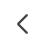
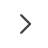
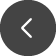
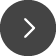
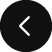
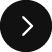
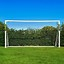
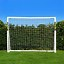
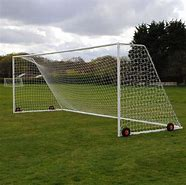
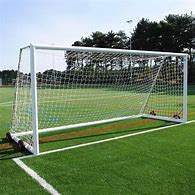
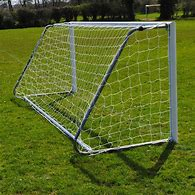
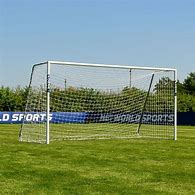
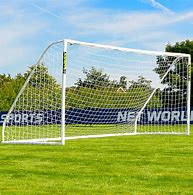
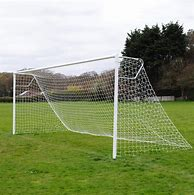
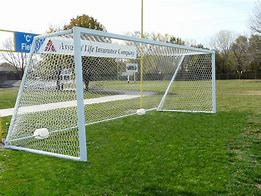
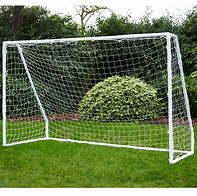
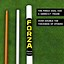
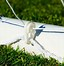
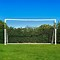
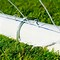
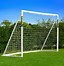
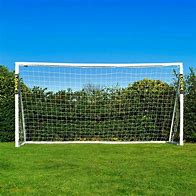
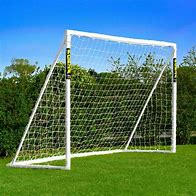
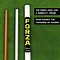
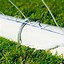
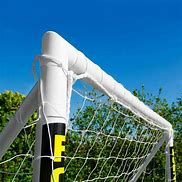

In [24]:
# test if it scrapes
request_text= "https://www.bing.com/images/search?q=%D9%85%D9%84%D8%AE+%D8%A8%D8%A7%D8%AF%DB%8C&first=1"
request_text= "https://www.bing.com/images/search?q=" + query_context +"&first=1"
response = requests.get(request_text, headers=agent)
print("request number ", i, "status code: " , response.status_code)
html = response.text
soup = BeautifulSoup(html, 'lxml')
soup

In [28]:
agent = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36 Vivaldi/5.3.2679.70.'}

ensemble_df = pd.DataFrame()

k=0
search_engine= "bing"
folder_query =os.path.join(search_engine,"query")
folder_csv =os.path.join(search_engine,"csv")
folder_DB = "DB"
dest = "data"
file_names=[]
#for i in range(testFa.shape[0]):
#for i in range(454,testFa.shape[0]):
for i in range(4,6):
    print("treating context ", i)
    query_name = testFa.values[i][0]
    query_context = testFa.values[i][1]
    path="data"
    print ("getting images of context", query_context)
    dest_Qfolder= os.path.join(folder_query,str(i))
    if not os.path.isdir(dest_Qfolder):
       os.makedirs(dest_Qfolder)
    request_text= "https://www.bing.com/images/search?q=" + query_context +"&first=1"

    #request_text= "https://www.qwant.com/?l=fr&t=images&q="+ query_context
    response = requests.get(request_text, headers=agent)
    print("request number ", i, "status code: " , response.status_code)
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    # the tag of all the results

    outer_most_point=soup.find_all('div',attrs={'class': 'dgControl dtl hover'})
    search_results = []
    df_results=[]
    k= 0
    for j in outer_most_point:
        # the tag of each result
        result_info=j.find_all('ul',{'class':'dgControl_list'})
        #print(result_info)
        if result_info != None:
          for s in result_info:
            result_info_line=s.find_all('div',{'class':'iuscp isv'})
            # for each line of results
            if result_info_line != None:
              for r in result_info_line:
                # get the url where the image appears
                if r.find('a',{'class':'iusc'}) != None:
                  #web_url=r.find('a',{'class':'iusc'})['m']
                  web_url = json.loads(r.find('a',{'class':'iusc'})['m'])['purl']
                # get the title which will serve as a context of the image
                if r.find('ul',{'class':'b_dataList'}) != None:
                  result_title=r.find('ul',{'class':'b_dataList'}).find('a')['title']
                # get url of the image
                # murl for original image turl for thumbnail
                if r.find('a',{'class':'iusc'}) != None:
                  image_url=json.loads(r.find('a',{'class':'iusc'})['m'])['turl']
                else : image_url = []
                if  r.find('a',{'class':'iusc'}).has_attr('src'):
                  image_content= r.find('a',{'class':'iusc'})['src']
                else : image_content = []

                k=k+1
                search_results.append([result_title, web_url, image_url, image_content])
    df_results=pd.DataFrame(search_results, columns =['result title','web_url',  'image_url','image content' ])
    for j in range (len(df_results)):
      if df_results.iloc[j]['image_url'] != []:
        img_data = requests.get(df_results.iloc[j]['image_url']).content
        image_name = os.path.join(dest_Qfolder  , search_engine + '_'+ str(j) +'.jpg')
        with open(image_name, 'wb') as handler:
          handler.write(img_data)
      elif df_results.iloc[j]['image content'] != []:
        img_data = requests.get(df_results.iloc[j]['image content']).content
        image_name = os.path.join(dest_Qfolder  , search_engine + '_'+ str(j) +'.jpg')
        with open(image_name, 'wb') as handler:
          handler.write(img_data)
        print(image_name , df_results.iloc[j]['image_url'])

    if not os.path.isdir(folder_csv):
       os.makedirs(folder_csv)
    name= os.path.join(folder_csv,language +'_' + search_engine + '_' + str(i) +'.csv')
    df_results.to_csv(name)



treating context  4
getting images of context butterball person
request number  4 status code:  200
treating context  5
getting images of context neptune statue
request number  5 status code:  200


# **Sixth Ecosia**
WORKING

In [ ]:
# test if it scrapes
#request_text= "https://www.ecosia.org/images?q=%D9%85%D9%84%D8%AE%20%D8%A8%D8%A7%D8%AF%DB%8C"
request_text= "https://www.ecosia.org/images?q=" + query_context
response = requests.get(request_text, headers=agent)
print("request number ", i, "status code: " , response.status_code)
html = response.text
soup = BeautifulSoup(html, 'lxml')

In [ ]:
#soup

In [13]:
agent = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36 Vivaldi/5.3.2679.70.'}

ensemble_df = pd.DataFrame()

k=0
search_engine= "ecosia"
folder_query =os.path.join(search_engine,"query")
folder_csv =os.path.join(search_engine,"csv")
folder_DB = "DB"
dest = "data"
file_names=[]
#for i in range(testFa.shape[0]):
for i in range(267,testFa.shape[0]):
#for i in range(1,2):
    print("treating context ", i)
    query_name = testFa.values[i][0]
    query_context = testFa.values[i][1]
    path="data"
    print ("getting images of context", query_context)
    dest_Qfolder= os.path.join(folder_query,str(i))
    if not os.path.isdir(dest_Qfolder):
       os.makedirs(dest_Qfolder)
    request_text= "https://www.ecosia.org/images?q=" + query_context

    #request_text= "https://www.qwant.com/?l=fr&t=images&q="+ query_context
    response = requests.get(request_text, headers=agent)
    print("request number ", i, "status code: " , response.status_code)
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    # the tag of all the results

    outer_most_point=soup.find_all('div',{'class':'image-feed'})
    search_results = []
    df_results=[]
    k= 0
    for j in outer_most_point:
        # the tag of each result
        result_info=j.find_all('article')
        #print(result_info)
        if result_info != None:
            for r in result_info:
              # image link
              if r.find('img',{'class':'image-result__image'}) != None:
                if r.find('img',{'class':'image-result__image'}).has_attr('src'):
                    image_url=r.find('img',{'class':'image-result__image'})['src']
              if r.find('a',{'class':'image-result__link'}) != None:
                if r.find('a',{'class':'image-result__link'}).has_attr('href'):
                    image_content=r.find('a',{'class':'image-result__link'})['href']
              if r.find('a',{'class':'image-result__details-link'}) != None:
                web_url=r.find('a',{'class':'image-result__details-link'})['href']
              if r.find('h2',{'class':'image-result__details-title'}) != None:
                result_title=r.find('h2',{'class':'image-result__details-title'}).text.strip()
              search_results.append([result_title, web_url, image_url, image_content])
    df_results=pd.DataFrame(search_results, columns =['result title','web_url',  'image_url','image content' ])
    for j in range (len(df_results)):
      if df_results.iloc[j]['image_url'] != []:
        img_data = requests.get(df_results.iloc[j]['image_url']).content
        image_name = os.path.join(dest_Qfolder  , 'g_'+ str(j) +'.jpg')
        with open(image_name, 'wb') as handler:
          handler.write(img_data)
      elif df_results.iloc[j]['image content'] != []:
        img_data = requests.get(df_results.iloc[j]['image content']).content
        image_name = os.path.join(dest_Qfolder  , search_engine + '_'+ str(j) +'.jpg')
        with open(image_name, 'wb') as handler:
          handler.write(img_data)
        #print(image_name , df_results.iloc[j]['image_url'])
    if not os.path.isdir(folder_csv):
       os.makedirs(folder_csv)
    name= os.path.join(folder_csv,language +'_' + search_engine + '_' + str(i) +'.csv')
    df_results.to_csv(name)

treating context  267
getting images of context floppy disk
request number  267 status code:  200
treating context  268
getting images of context lumber craft
request number  268 status code:  200
treating context  269
getting images of context measuring balance
request number  269 status code:  200
treating context  270
getting images of context bang blast
request number  270 status code:  200
treating context  271
getting images of context delivery baseball
request number  271 status code:  200
treating context  272
getting images of context cassiopeia stars
request number  272 status code:  200
treating context  273
getting images of context cabinet drawer
request number  273 status code:  200
treating context  274
getting images of context coachwhip shrub
request number  274 status code:  200
treating context  275
getting images of context gantlet armor
request number  275 status code:  200
treating context  276
getting images of context watch a movie
request number  276 status cod

request number  349 status code:  200
treating context  350
getting images of context paving flag
request number  350 status code:  200
treating context  351
getting images of context anjou bunch
request number  351 status code:  200
treating context  352
getting images of context cloudy sky
request number  352 status code:  200
treating context  353
getting images of context beaver rodent
request number  353 status code:  200
treating context  354
getting images of context rifle slug
request number  354 status code:  200
treating context  355
getting images of context wood log
request number  355 status code:  200
treating context  356
getting images of context edible grape
request number  356 status code:  200
treating context  357
getting images of context gem pastry
request number  357 status code:  200
treating context  358
getting images of context cricket game
request number  358 status code:  200
treating context  359
getting images of context mantle shelf
request number  359 s

request number  432 status code:  200
treating context  433
getting images of context building flat
request number  433 status code:  200
treating context  434
getting images of context animal tail
request number  434 status code:  200
treating context  435
getting images of context bighorn river
request number  435 status code:  200
treating context  436
getting images of context cat feline
request number  436 status code:  200
treating context  437
getting images of context meat chuck
request number  437 status code:  200
treating context  438
getting images of context sharp crease
request number  438 status code:  200
treating context  439
getting images of context stone cutter
request number  439 status code:  200
treating context  440
getting images of context gin digestive
request number  440 status code:  200
treating context  441
getting images of context crunchy earthnut
request number  441 status code:  200
treating context  442
getting images of context fabric embroidery
req

In [ ]:
df_results.head()

# **Fifth Yahoo Search**
WORKING 

NOT WORKING anymore, needs to checked

In [ ]:
# test if it scrapes
#request_text= "https://fr.images.search.yahoo.com/search/images?p=%D9%85%D9%84%D8%AE+%D8%A8%D8%A7%D8%AF%DB%8C"
request_text= "https://fr.images.search.yahoo.com/search/images?p=" + query_context +"&first=1"
response = requests.get(request_text, headers=agent)
print("request number ", i, "status code: " , response.status_code)
html = response.text
soup = BeautifulSoup(html, 'lxml')
#soup

This code is not working anymore, it seems like yahoo changed the names of the tags, have to check this code again

In [23]:
agent = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36 Vivaldi/5.3.2679.70.'}

ensemble_df = pd.DataFrame()

k=0
search_engine= "yahoo_serach"
folder_query =os.path.join(search_engine,"query")
folder_csv =os.path.join(search_engine,"csv")
folder_DB = "DB"
dest = "data"
file_names=[]
for i in range(testFa.shape[0]):
#for i in range(59,testFa.shape[0]):
#for i in range(1,2):
    print("treating context ", i)
    query_name = testFa.values[i][0]
    query_context = testFa.values[i][1]
    path="data"
    print ("getting images of context", query_context)
    dest_Qfolder= os.path.join(folder_query,str(i))
    if not os.path.isdir(dest_Qfolder):
       os.makedirs(dest_Qfolder)
    request_text= "https://fr.images.search.yahoo.com/search/images?p=" + query_context +"&first=1"

    #request_text= "https://www.qwant.com/?l=fr&t=images&q="+ query_context
    response = requests.get(request_text, headers=agent)
    print("request number ", i, "status code: " , response.status_code)
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    # the tag of all the results

    outer_most_point=soup.find_all('ul',{'id':'sres'})

    search_results = []
    df_results=[]
    k= 0
    for j in outer_most_point:
        # the tag of each result
        result_info=j.find_all('li',{'class':'ld'})
        #print(result_info)
        if result_info != None:
            for r in result_info:
              # get the url where the image appears
              #if web_url=json.loads(r['data'])['rurl']
              if 'rurl' in json.loads(r['data']):
                    web_url=json.loads(r['data'])['rurl']
              else:
                    if r.find('span',{'class':'ht'}) != None:
                        web_url=r.find('span',{'class':'ht'})['aria-label']
                    else:
                        web_url=[]
             
              if r.find('a',{'class':'img'}) != None:
                result_title=r.find('a',{'class':'img'})['aria-label']
              if r.find('img',{'class':'process'}) != None:
                image_content=r.find('img',{'class':'process'})['data-src']
                print(image_url)
              if r.find('a',{'class':'img'}) != None:
                for s  in r.find('a',{'class':'img'}).find_all('img'):
                  if s.has_attr('src'):
                    image_url=s['src']
              search_results.append([result_title, web_url, image_url, image_content])
    df_results=pd.DataFrame(search_results, columns =['result title','web_url',  'image_url','image content' ])
    for j in range (len(df_results)):
      if df_results.iloc[j]['image_url'] != []:
        img_data = requests.get(df_results.iloc[j]['image_url']).content
        image_name = os.path.join(dest_Qfolder  , search_engine + '_'+ str(j) +'.jpg')
        with open(image_name, 'wb') as handler:
          handler.write(img_data)
      elif df_results.iloc[j]['image content'] != []:
        img_data = requests.get(df_results.iloc[j]['image content']).content
        image_name = os.path.join(dest_Qfolder  , search_engine + '_'+ str(j) +'.jpg')
        with open(image_name, 'wb') as handler:
          handler.write(img_data)
        #print(image_name , df_results.iloc[j]['image_url'])
    if not os.path.isdir(folder_csv):
       os.makedirs(folder_csv)
    name= os.path.join(folder_csv,language +'_' + search_engine + '_' + str(i) +'.csv')
    df_results.to_csv(name)

treating context  0
getting images of context football goal
request number  0 status code:  200
https://tse3.mm.bing.net/th?id=OIP.KdtD2otJLddZ-Sqn9IPUwAHaHa&pid=Api&P=0&w=300&h=300
https://tse3.mm.bing.net/th?id=OIP.BWAvdXNw3ozMWZFnnWQ2JgHaGL&pid=Api&P=0&w=300&h=300
https://tse2.mm.bing.net/th?id=OIP.eUJZTzQThB1Y2BGICP4PvQHaHa&pid=Api&P=0&w=300&h=300
https://tse4.mm.bing.net/th?id=OIP.EGOZsN7lQLBgiA7IuPo6igHaHa&pid=Api&P=0&w=300&h=300
https://tse3.mm.bing.net/th?id=OIP.83pcEjsKZsYdJ5Wegnx5ogHaHa&pid=Api&P=0&w=300&h=300
https://tse3.mm.bing.net/th?id=OIP.aIrq-EdQ0GD0PkzJkj9_hgHaHa&pid=Api&P=0&w=300&h=300
https://tse2.mm.bing.net/th?id=OIP.41NPwqjJP3dwy6u91_bCiwHaHa&pid=Api&P=0&w=300&h=300
https://tse2.mm.bing.net/th?id=OIP.leGwDsvU9223bA2CTCRr-QHaHZ&pid=Api&P=0&w=300&h=300
https://tse4.mm.bing.net/th?id=OIP.AwTE0MhmbDFXlprLWepCwAHaF6&pid=Api&P=0&w=300&h=300
https://tse2.mm.bing.net/th?id=OIP.pWZu_I1blCc2IyJp5_hqfwHaHa&pid=Api&P=0&w=300&h=300
https://tse2.mm.bing.net/th?id=OIP.ZwI8qxPph

KeyError: 'aria-label'

In [15]:
json.loads(r['data'])

{'tw': 1000, 'th': 200, 'ad': True, 'typ': 'ad'}

In [18]:
r

<li class="ld ignore dynamic-inline-ad" data='{"tw":1000,"th":200,"ad":true,"typ":"ad"}' style="width:99%; height:auto"><div class="clear-float"></div><div class="ads south ta cols-1" data-bk="32.1" data-bns="Yahoo"><h2 class="ad-hdr"><a class="sr" href="http://www.microsoftadvertising.fr/b2byahoo?s_cid=fr_smb_yahoo_rail" target="_blank">Liens Sponsorisés</a></h2><ul data-bns="Yahoo"><div class="row"><li class="e last-col" data-bg-link="https://r.search.yahoo.com/cbclk2/dWU9RkI2MTY2RkZCMDJENEM3OSZ1dD0xNjkxNzUwMzczMDUxJnVvPTg1MDA2NTQyMTYyMTkyJmx0PTImcz0xJmVzPWJ3eUtxREVHUFMuRVJiUlRuOGdnWjVBMFJ5aXZoTjUxZDhMeEdhYlU3MS5OTVU0LQ--/RV=2/RE=1691779173/RO=10/RU=https%3a%2f%2fwww.bing.com%2faclick%3fld%3de8357-5n5NzLUGhVi9y_1h8DVUCUynmADfna-iukw1_pUEsocKONVuCq82ScUpRl7ZgZoEk-E2TWifsy4yrtawqs65zYG02OTJ4kh_sfV3FQdBpF33k4JDN1zeI8GpTtdaoqmZyl9v4pnJwSKYhHPCSrmPpaARiGPsr3IXGpsrkBl2aigPZw2rSeRZgTWbEkmpRy2w1Q%26u%3daHR0cCUzYSUyZiUyZmJlc3Rwcm9kdWN0c3Jldmlld3MuY29tJTJmZm9vdGJhbGwtZ29hbHMtZm9yLWtpZHMlM2Z0YX

In [ ]:
df_results.head()

In [174]:
df_results.shape

(49, 4)

# **Seventh Karma**
NOT WORKING

In [195]:
# test if it scrapes
request_text= "https://karmasearch.org/images?q=%D9%85%D9%84%D8%AE%20%D8%A8%D8%A7%D8%AF%DB%8C&p=1"
#https://karmasearch.org/images?q=%D9%85%D9%84%D8%AE%20%D8%A8%D8%A7%D8%AF%DB%8C&p=1
#request_text= "https://karmasearch.org/images?q=" + query_context
response = requests.get(request_text, headers=agent)
print("request number ", i, "status code: " , response.status_code)
html = response.text
soup = BeautifulSoup(html, 'lxml')

request number  1 status code:  200


In [197]:
#soup

In [ ]:
agent = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36 Vivaldi/5.3.2679.70.'}

ensemble_df = pd.DataFrame()

k=0
search_engine= "karma"
folder_query =os.path.join(search_engine,"query")
folder_csv =os.path.join(search_engine,"csv")
folder_DB = "DB"
dest = "data"
file_names=[]
for i in range(testFa.shape[0]):
#for i in range(1,2):
    print("treating context ", i)
    query_name = testFa.values[i][0]
    query_context = testFa.values[i][1]
    path="data"
    print ("getting images of context", query_context)
    dest_Qfolder= os.path.join(folder_query,str(i))
    if not os.path.isdir(dest_Qfolder):
       os.makedirs(dest_Qfolder)
    request_text= "https://www.ecosia.org/images?q=" + query_context

    #request_text= "https://www.qwant.com/?l=fr&t=images&q="+ query_context
    response = requests.get(request_text, headers=agent)
    print("request number ", i, "status code: " , response.status_code)
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    # the tag of all the results

    outer_most_point=soup.find_all('div',{'class':'image-feed'})
    search_results = []
    df_results=[]
    k= 0
    for j in outer_most_point:
        # the tag of each result
        result_info=j.find_all('article')
        #print(result_info)
        if result_info != None:
            for r in result_info:
              # image link
              if r.find('img',{'class':'image-result__image'}) != None:
                if r.find('img',{'class':'image-result__image'}).has_attr('src'):
                    image_url=r.find('img',{'class':'image-result__image'})['src']
              if r.find('a',{'class':'image-result__link'}) != None:
                if r.find('a',{'class':'image-result__link'}).has_attr('href'):
                    image_content=r.find('a',{'class':'image-result__link'})['href']
              if r.find('a',{'class':'image-result__details-link'}) != None:
                web_url=r.find('a',{'class':'image-result__details-link'})['href']
              if r.find('h2',{'class':'image-result__details-title'}) != None:
                result_title=r.find('h2',{'class':'image-result__details-title'}).text.strip()
              search_results.append([result_title, web_url, image_url, image_content])
    df_results=pd.DataFrame(search_results, columns =['result title','web_url',  'image_url','image content' ])
    for j in range (len(df_results)):
      if df_results.iloc[j]['image_url'] != []:
        img_data = requests.get(df_results.iloc[j]['image_url']).content
        image_name = os.path.join(dest_Qfolder  , search_engine + '_'+ str(j) +'.jpg')
        with open(image_name, 'wb') as handler:
          handler.write(img_data)
      elif df_results.iloc[j]['image content'] != []:
        img_data = requests.get(df_results.iloc[j]['image content']).content
        image_name = os.path.join(dest_Qfolder  , search_engine + '_'+ str(j) +'.jpg')
        with open(image_name, 'wb') as handler:
          handler.write(img_data)
        #print(image_name , df_results.iloc[j]['image_url'])

    if not os.path.isdir(folder_csv):
       os.makedirs(folder_csv)
    name= os.path.join(folder_csv,language +'_' + search_engine + '_' + str(i) +'.csv')
    df_results.to_csv(name)

treating context  1
getting images of context ملخ بادی
request number  1 status code:  200


In [198]:
df_results.head()

,result title,web_url,image_url,image content
0,تجارت ملخ,https://www.alef.ir/news/3980416083.html,https://tse3.mm.bing.net/th?id=OIP.mubDT0kH46x...,http://www.alef.ir/files/post/lg/2019/27/13128...
1,بالاخره پای موجودات کمی چندش ولی نه‌چندان خطرن...,https://www.hamshahrionline.ir/news/443450/%D8...,https://tse3.mm.bing.net/th?id=OIP.m7LJ-idA2HV...,https://media.hamshahrionline.ir/d/2019/06/10/...
2,فائو : بی سابقه ترین تهاجم ملخ ها در 25 سال اخ...,https://www.taranomdasht.ir/%D9%81%D8%A7%D8%A6...,https://tse2.mm.bing.net/th?id=OIP.4CZb5kNJ-8z...,https://www.taranomdasht.ir/wp-content/uploads...
3,آشنایی با انواع ملخ ها | چرا ملخ ها باعث آفت م...,https://sampashi-negarin.com/%D8%A2%D8%B4%D9%8...,https://tse2.mm.bing.net/th?id=OIP.6-wbqw8_AGB...,https://sampashi-negarin.com/wp-content/upload...
4,مبارزه با ملخ صحرایی در کشور ادامه دارد,https://tirdadnews.ir/fa/news/161/%D9%85%D8%A8...,https://tse3.mm.bing.net/th?id=OIP.VA9E0BQCVFm...,http://tirdadnews.ir/files/fa/news/1398/4/9/65...
